In [4]:
import mle as mle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

import numpy as np
from datetime import timedelta, datetime
import backtesting as bt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import scipy.stats as stats

from copy import copy


import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

### Create data for analysis

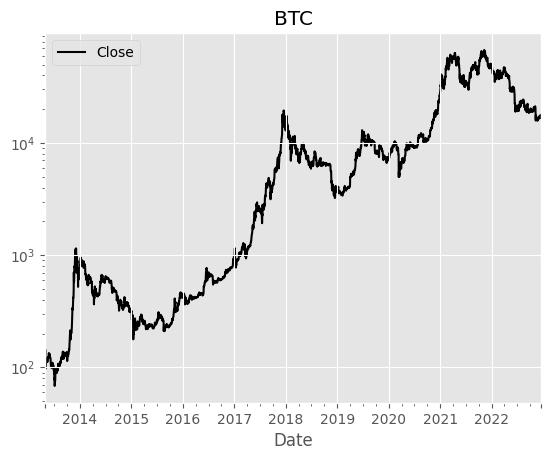

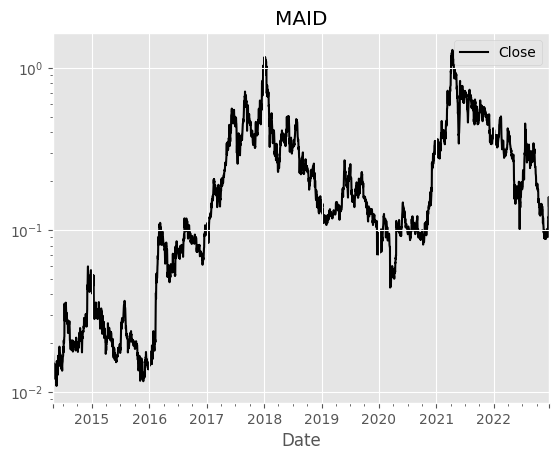

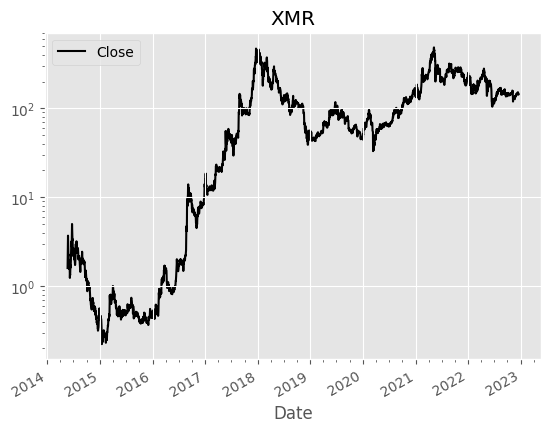

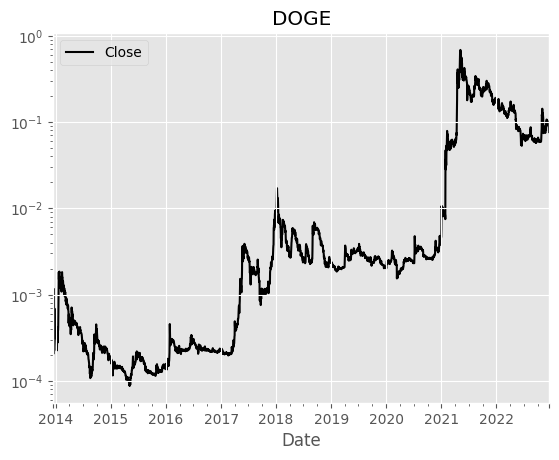

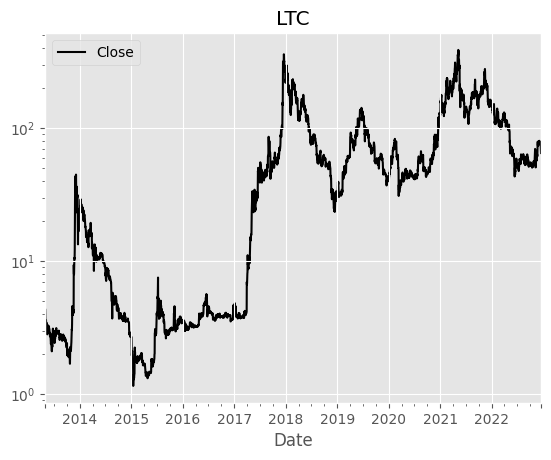

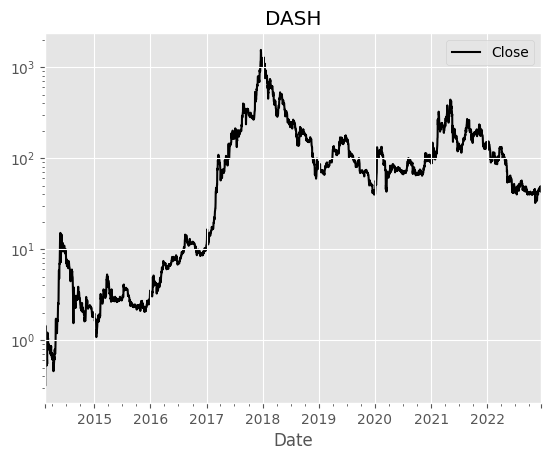

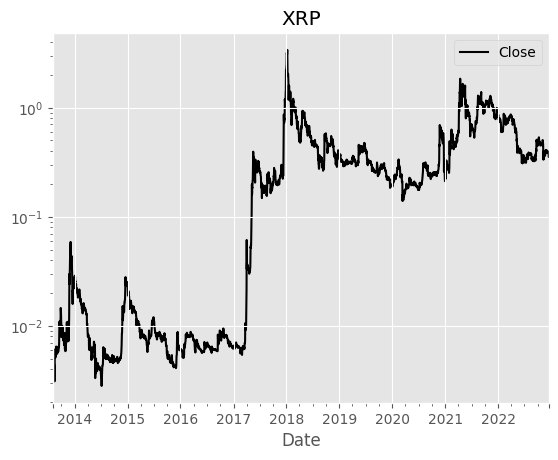

In [5]:
coins = ['BTC', 'MAID', 'XMR', 'DOGE', 'LTC', 'DASH', 'XRP']
dfs = dict()
for coin in coins:
    df = pd.read_csv(
        f'https://raw.githubusercontent.com/georgec123/sa_cw/main/data/prices/{coin}.csv').set_index('Date').sort_index()
    df.index = pd.to_datetime(df.index)
    df['log_return'] = -np.log(1 + df['Close'].pct_change())
    dfs[coin.lower()] = df.dropna()
    months = mdates.MonthLocator((1, 4, 7, 10))
    
    ax = plt.subplot()
    ax = df[['Close']].plot(ax=ax,logy=True, color='k', zorder=-10)
    
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.tick_bottom()
    
    plt.title(coin)
    plt.show()


best_dists = {
    'MAID': 'Laplace',
    'BTC': 'Generalized Hyperbolic',
    'DASH': 'Normalized Inverse Gaussian',
    'XRP': 'Normalized Inverse Gaussian',
    'XMR': 'Normalized Inverse Gaussian',
    'LTC': 'Generalized Hyperbolic',
    'DOGE': 'Generalized T'
}


### Fit models to all data

In [6]:
dists = [mle.Laplace, mle.SkewT, mle.SkewedStudent, mle.GeneralizedT,
         mle.NormalizedInverseGaussian, mle.GeneralizedHyperbolic, mle.StudentT,
         mle.AsymmetricStudentT]

end_date = pd.to_datetime('28-02-2017', format='%d-%m-%Y')
start_date = pd.to_datetime('23-06-2014', format='%d-%m-%Y')

info_list = []

for coin in coins:
    coin_df = dfs[coin.lower()]
    df = coin_df[(coin_df.index >= start_date) & (coin_df.index <= end_date)]
    for dist in dists:

        fitted_dist = dist()
        fitted_dist.mle(df['log_return'])
        info_dict = fitted_dist.info_dict()
        info_dict['coin'] = coin

        info_list.append(info_dict)
info_df = pd.DataFrame(info_list)


In [116]:
info_df

,dist,LL,AIC,AICC,BIC,CAIC,HQC,pydist,coin
0,Laplace,"-2,206.9920","-4,409.9841","-4,409.9718","-4,400.2049","-4,398.2049","-4,406.2640","Laplace(mu=-0.001, b=0.019)",BTC
1,Skew T,"-2,223.0130","-4,438.0260","-4,437.9851","-4,418.4676","-4,414.4676","-4,430.5859","Skew T(mu=-0.001, sigma=0.014, nu=1.819, lambd...",BTC
2,Skewed Student T,"-2,223.1434","-4,438.2868","-4,438.2459","-4,418.7284","-4,414.7284","-4,430.8467","Skewed Student T(mu=-0.001, sigma=0.014, nu=1....",BTC
3,Generalized T,"-2,234.2762","-4,460.5523","-4,460.5114","-4,440.9939","-4,436.9939","-4,453.1122","Generalized T(mu=-0.001, sigma=0.014, nu=5.190...",BTC
4,Normalized Inverse Gaussian,"-2,217.8747","-4,427.7494","-4,427.7085","-4,408.1911","-4,404.1911","-4,420.3094","Normalized Inverse Gaussian(mu=-0.001, delta=0...",BTC
5,Generalized Hyperbolic,"-2,234.0266","-4,458.0533","-4,457.9918","-4,433.6053","-4,428.6053","-4,448.7532","Generalized Hyperbolic(mu=-0.001, delta=0.010,...",BTC
6,Student T,"-2,222.9671","-4,439.9343","-4,439.9098","-4,425.2655","-4,422.2655","-4,434.3542","Student T(mu=-0.001, sigma=0.014, nu=1.823)",BTC
7,Asymmetric Student T,"-2,225.0485","-4,440.0971","-4,440.0356","-4,415.6491","-4,410.6491","-4,430.7970","Asymmetric Student T(mu=0.000, sigma=0.014, nu...",BTC
8,Laplace,"-1,315.8744","-2,627.7488","-2,627.7365","-2,617.9696","-2,615.9696","-2,624.0287","Laplace(mu=-0.000, b=0.048)",MAID
9,Skew T,"-1,320.2660","-2,632.5321","-2,632.4911","-2,612.9737","-2,608.9737","-2,625.0920","Skew T(mu=0.007, sigma=0.047, nu=3.466, lambda...",MAID


In [ ]:
best_query = ' or '.join([f" (coin=='{coin}' and dist=='{dist}') " for coin, dist in best_dists.items()])

out_df = info_df.query(best_query)
out_df = out_df.rename(columns={'dist':'Dist', 'coin':'Coin'}).drop(columns='pydist')
out_df = out_df[['Coin', 'Dist', 'LL', 'AIC', 'AICC', 'BIC', 'CAIC', 'HQC']]
out_df[[ 'LL', 'AIC', 'AICC', 'BIC', 'CAIC', 'HQC']] =  out_df[['LL', 'AIC', 'AICC', 'BIC', 'CAIC', 'HQC']].astype(int)

for idx, row in out_df.iterrows():
    print(' & '.join(map(str,row.tolist()))+' \\\ \hline')

### ACF plots show no serial correlation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


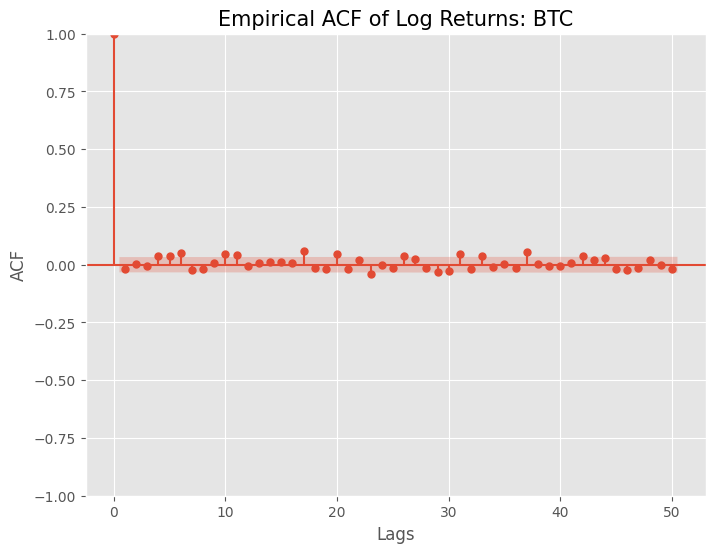

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


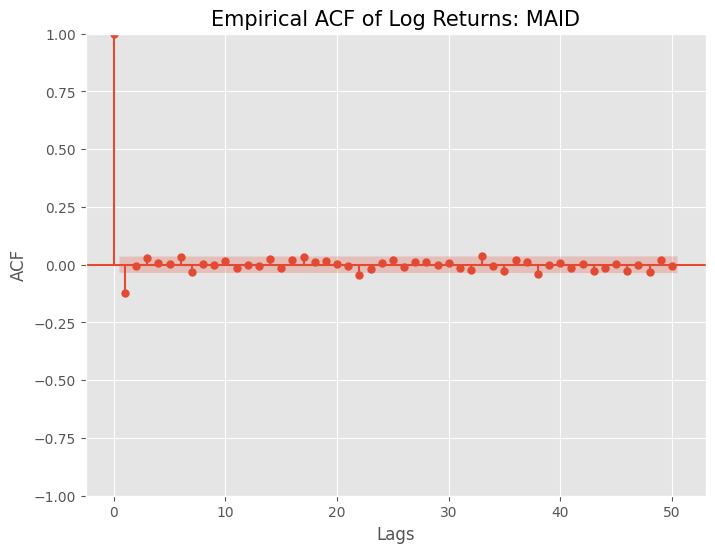

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


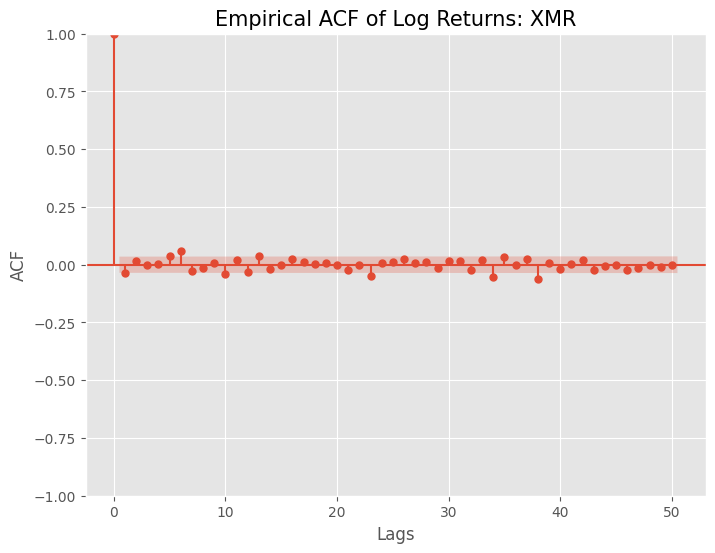

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


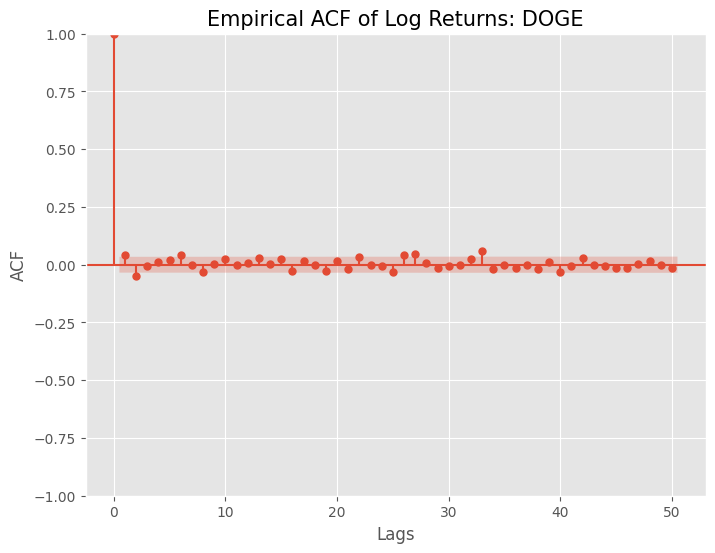

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


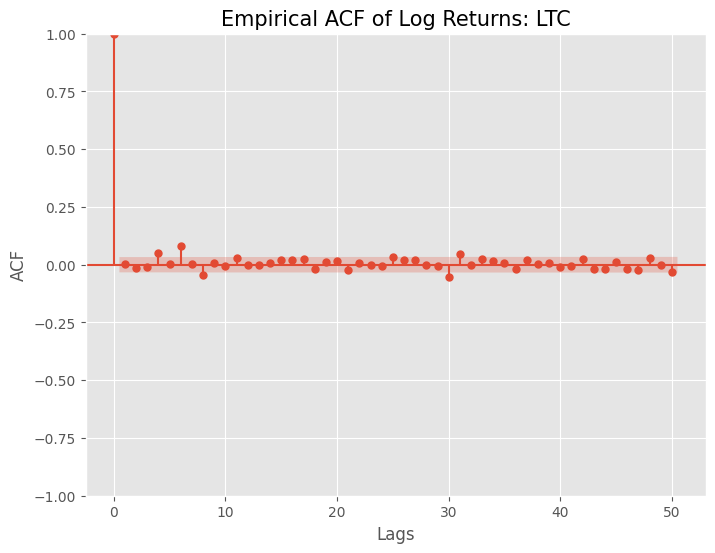

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


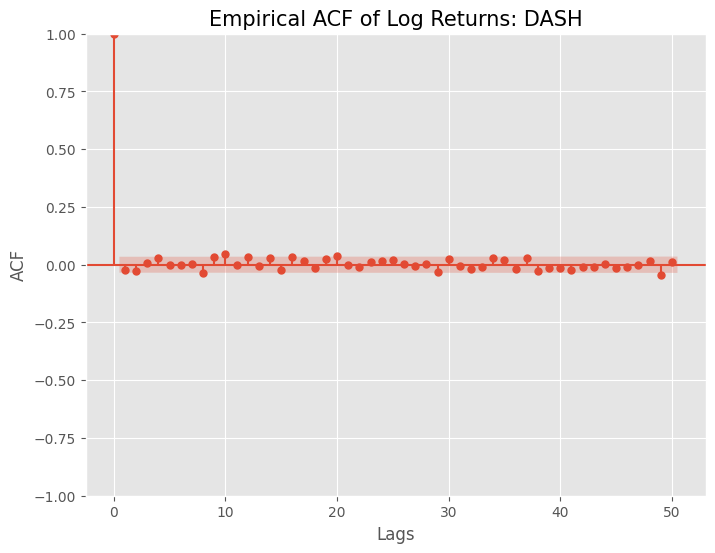

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


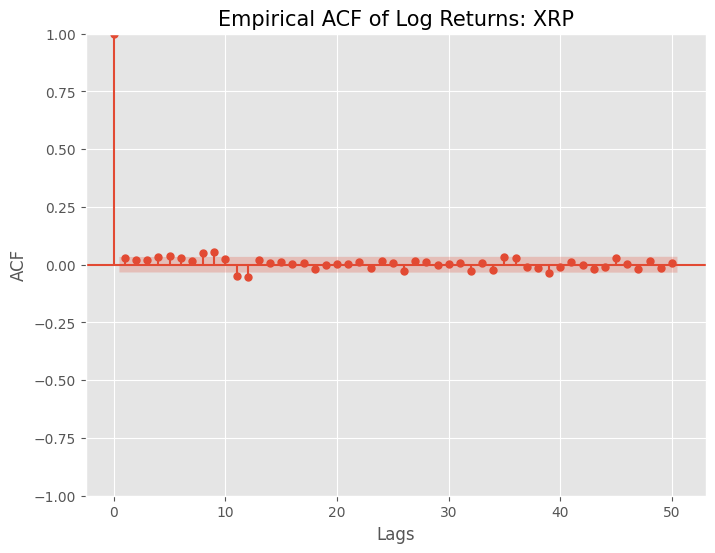

In [27]:
for coin in coins:
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.graphics.tsa.plot_acf(dfs[coin.lower()]['log_return'].dropna(
    ), lags=50, title="Empricial ACF of log returns", ax=ax)
    plt.title(f'Empirical ACF of Log Returns: {coin}', size=15)
    plt.xlabel("Lags", size=12)
    plt.ylabel("ACF", size=12)
    plt.savefig(f'../plots/acf/{coin}_acf.eps')
    plt.show()


### Breusch-Pegan Test to show no evidence of Heteroskedasticity

In [115]:
f = 'log_return ~ Date'
end_date = pd.to_datetime('28-02-2017', format='%d-%m-%Y')
start_date = pd.to_datetime('23-06-2014', format='%d-%m-%Y')

for coin in coins:
    df_coin = dfs[coin.lower()]
    df_to_fit = df_coin[(df_coin.index >= start_date)
                        & (df_coin.index <= end_date)]
                        
    f_model = ols(formula=f, data=df_to_fit.reset_index()).fit()
    test_result = sms.het_breuschpagan(f_model.resid, f_model.model.exog)

    lms, p_val, _, _ = test_result
    names = ['Lagrange multiplier statistic', 'p-value']
    print(f"{coin}: Lagrange multiplier statistic - {lms}. P-value {p_val:.4f}")


BTC: Lagrange multiplier statistic - 982.0. P-value 0.4850
MAID: Lagrange multiplier statistic - 982.0. P-value 0.4850
XMR: Lagrange multiplier statistic - 982.0. P-value 0.4850
DOGE: Lagrange multiplier statistic - 982.0. P-value 0.4850
LTC: Lagrange multiplier statistic - 982.0. P-value 0.4850
DASH: Lagrange multiplier statistic - 982.0. P-value 0.4850
XRP: Lagrange multiplier statistic - 982.0. P-value 0.4850


### Add qq plots


In [25]:
def qqplot(pydist):
    qs = list(np.linspace(0.01, 0.25, 12)) + \
        list(np.linspace(0.26, 0.75, 10))+list(np.linspace(0.76, 0.99, 12))

    quantiles = []
    for i in qs:
        q = pydist.quantile(i)
        quantiles.append(q)

    observed_quantiles = np.quantile(pydist.data.dropna().values, qs)
    _min = min(min(observed_quantiles), min(quantiles))
    _max = max(max(observed_quantiles), max(quantiles))
    fig, ax = plt.subplots()
    ax.scatter(quantiles, observed_quantiles)
    ax.set_aspect('equal', adjustable='box')

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    ax.set_ylabel('Obseved quantiles')
    ax.set_xlabel('Theoretical quantiles')

    return fig, ax



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


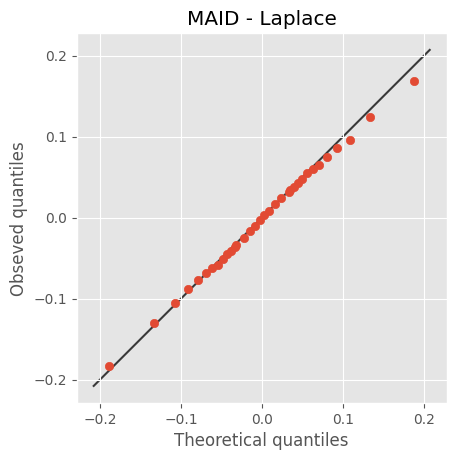

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


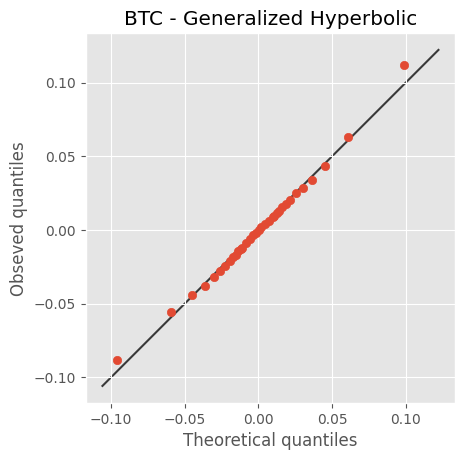

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


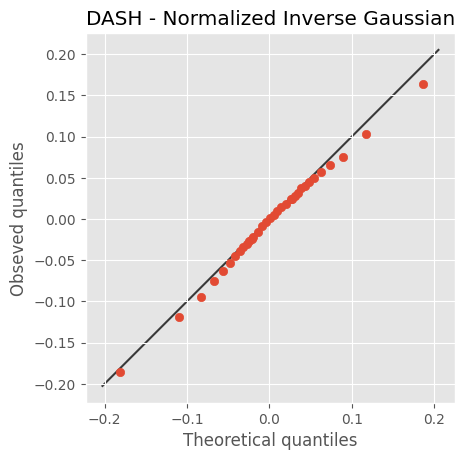

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


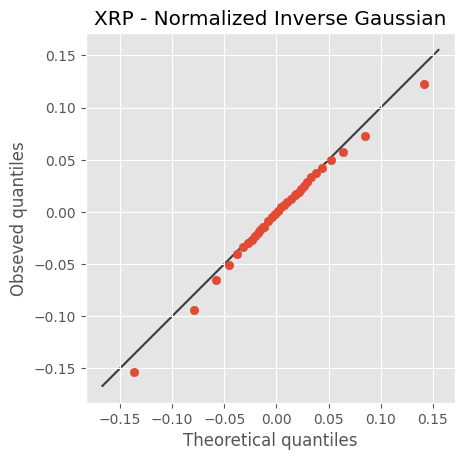

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


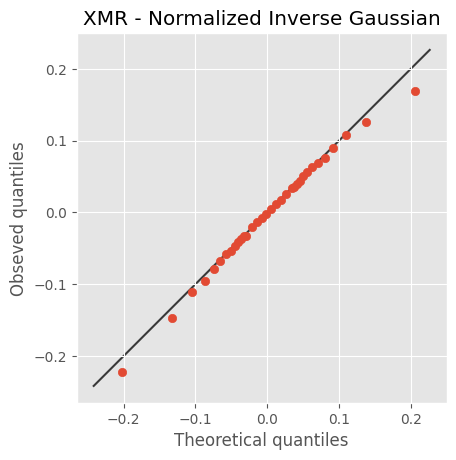

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


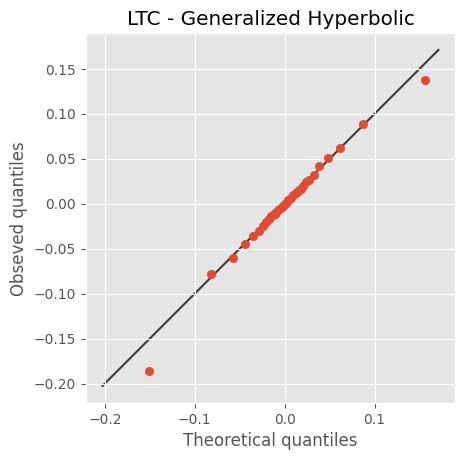

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


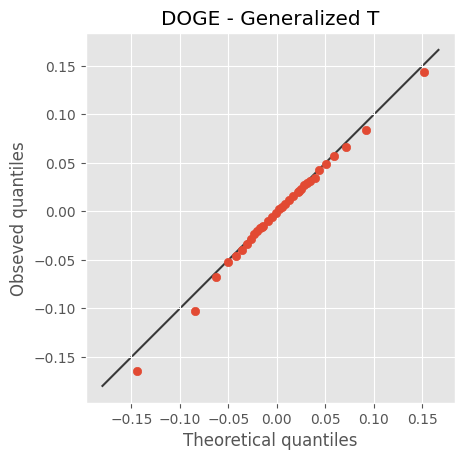

In [26]:

for coin, dist in best_dists.items():

    pydist = info_df[(info_df['coin'] == coin) & (
        info_df['dist'] == dist)]['pydist'].iloc[0]

    fig, ax = qqplot(pydist)
    ax.set_title(f"{coin} - {pydist.name}")
    plt.savefig(f'../plots/qq/{coin}_qq.eps')
    plt.show()


### Analyse fit stability over time 

- Calculate fit parameters over a rolling window
- Plot data and save to file

In [32]:
# ~ 9m runtime

info_list = []
jump = 90
start_to_end_days = 981

start_date = pd.to_datetime('23-06-2014', format='%d-%m-%Y')
end_date = start_date + timedelta(days=start_to_end_days)


while end_date <= datetime.now():

    for coin in coins:
        coin_df = dfs[coin.lower()]
        df = coin_df[(coin_df.index >= start_date)
                     & (coin_df.index <= end_date)]
        # df = coin_df
        for dist in dists:

            fitted_dist = dist()
            fitted_dist.mle(df['log_return'])
            info_dict = fitted_dist.info_dict()
            info_dict['coin'] = coin
            info_dict['start_date'] = start_date
            info_dict['end_date'] = end_date

            info_list.append(info_dict)

    start_date = start_date + timedelta(days=jump)
    end_date = start_date + timedelta(days=start_to_end_days)
params_over_time = pd.DataFrame(info_list)


for coin in coins:

    tmp = params_over_time[params_over_time['coin'] == coin]
    tmp = tmp[['end_date', 'dist', 'AIC']].set_index('end_date')
    tmp = tmp.pivot(columns='dist')

    tmp.columns = [col[1] for col in tmp.columns]

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    ax1 = tmp.plot(ax=ax1)
    ax1.set_title(f"{coin.upper()}")
    ax1.set_ylabel('AIC')
    ax2.set_xlabel('')

    ax1.legend(loc=2, fontsize=8)

    ax2 = tmp.rank(axis=1).plot(ax=ax2)
    ax2.set_ylabel('Ranking')
    ax2.set_xlabel('End Date')
    ax2.get_legend().remove()

    plt.savefig(f'../plots/fit_over_time/{coin}.eps')
    plt.clf()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

### Kupiec’s plots

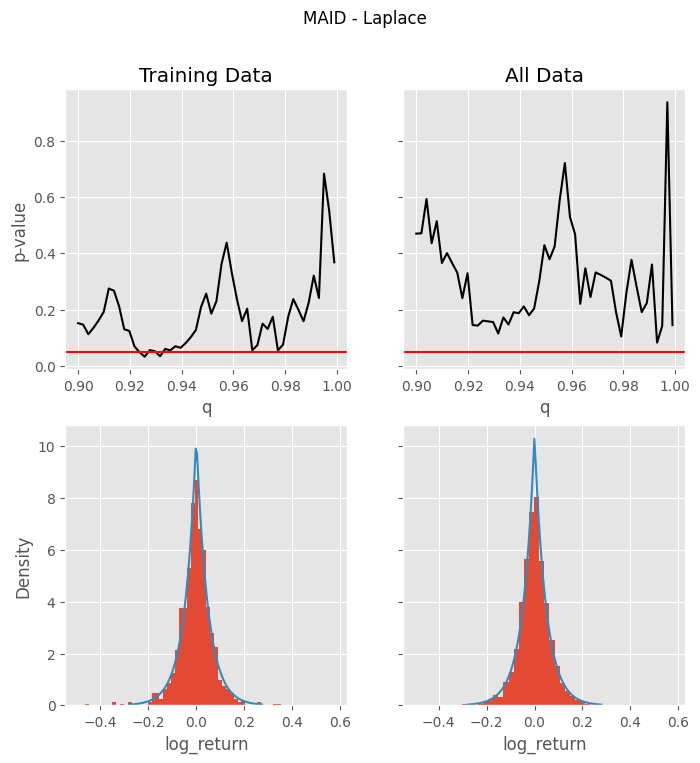

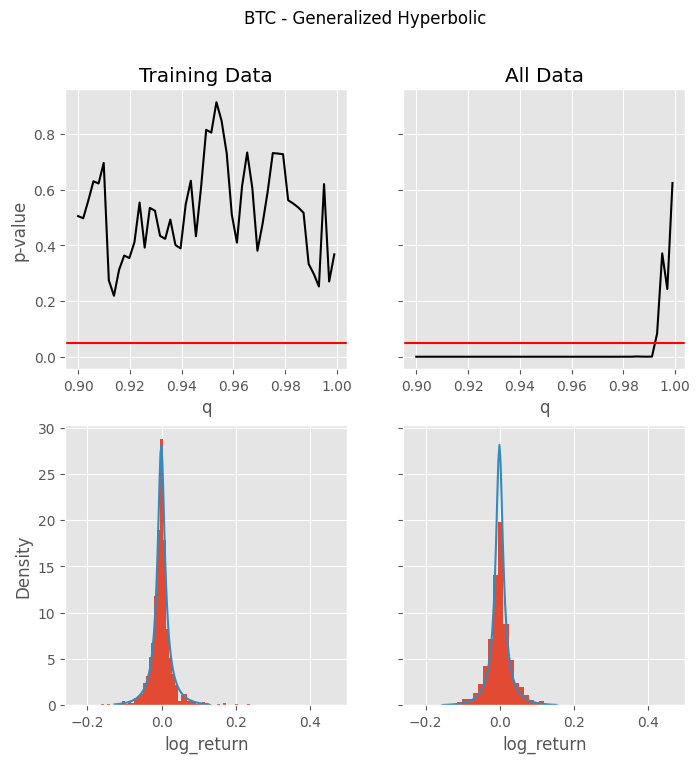

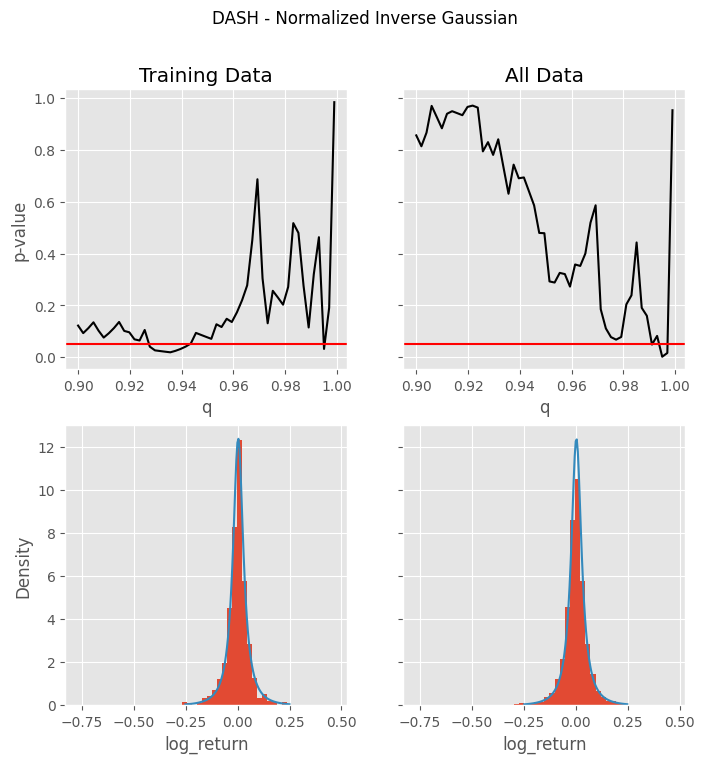

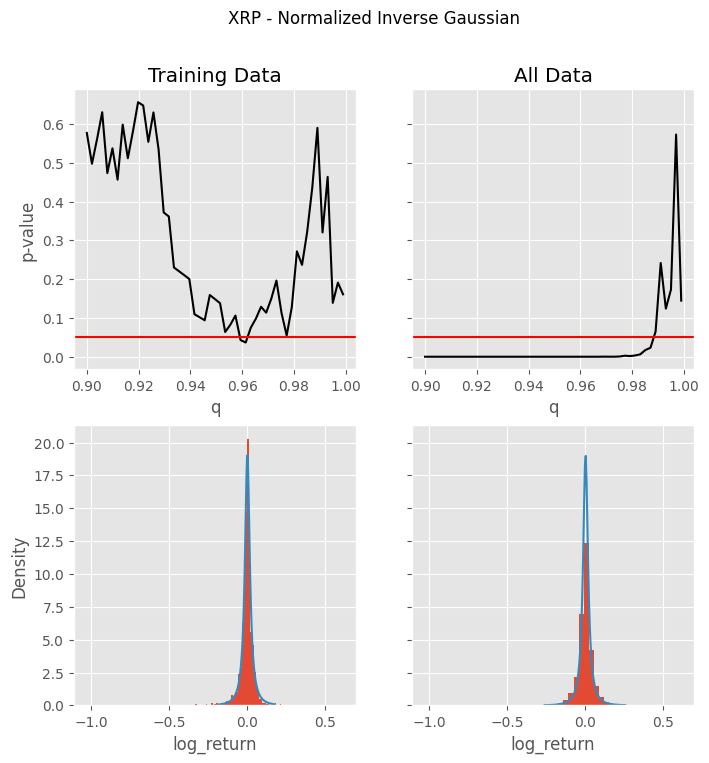

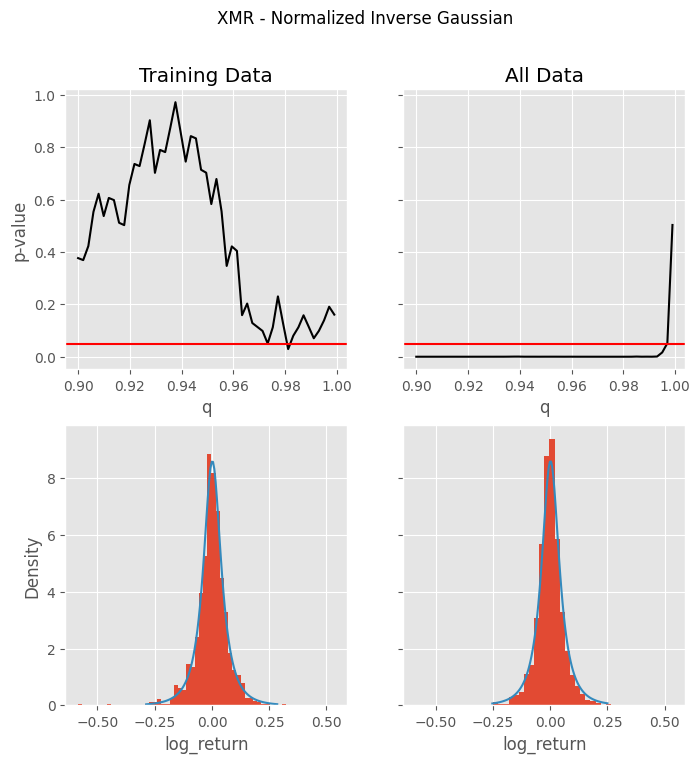

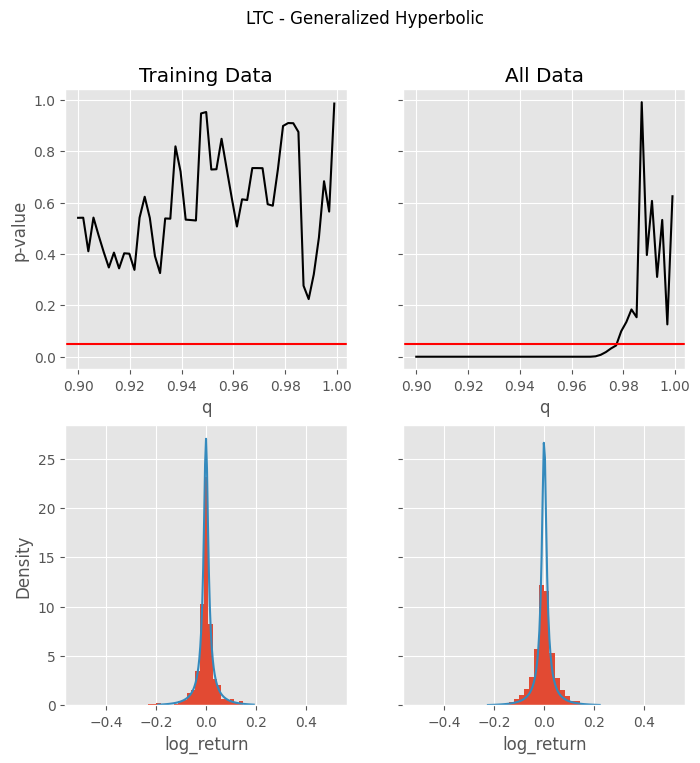

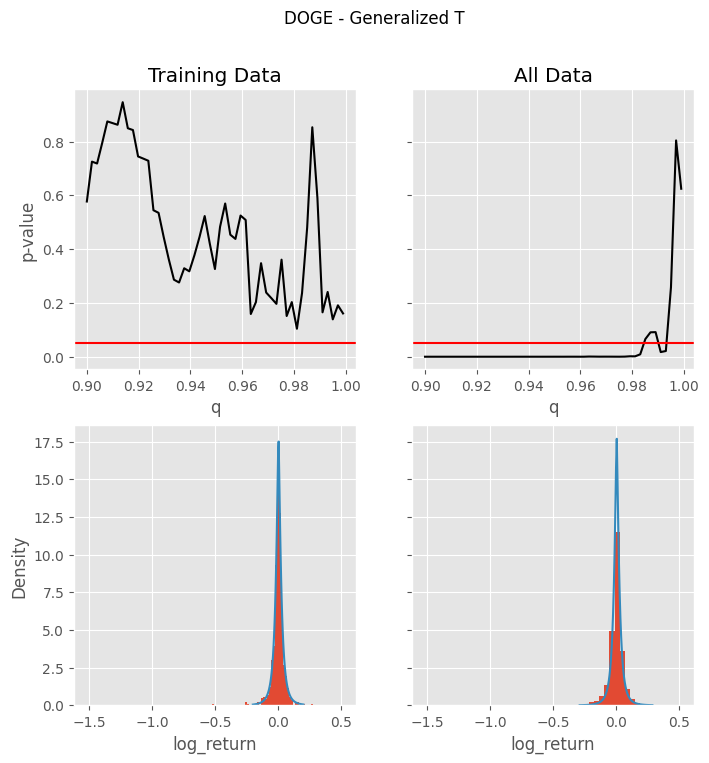

In [31]:
quantiles = np.linspace(0.9, 0.999, 51)

for coin, dist in best_dists.items():
    pydist = info_df[(info_df['coin'] == coin) & (
        info_df['dist'] == dist)]['pydist'].iloc[0]
    
    fig, axs = plt.subplots(2,2, sharey='row', sharex='row', figsize=(8,8))
    
    axs[0][0] = pydist.kupic_plot(quantiles=quantiles, ax=axs[0][0])
    
    fig.suptitle(f"{coin} - {dist}")
    
    dist_copy = copy(pydist)

    df = dfs[coin.lower()]
    df = df[df.index>=start_date]
    
    dist_copy.data = df['log_return']

    axs[0][1] = dist_copy.kupic_plot(quantiles=quantiles, ax=axs[0][1])
    
    axs[0][0].set_ylabel("p-value")
    axs[1][0].set_ylabel("Density")

    axs[0][1].set_xlabel("q")
    axs[0][0].set_xlabel("q")

    axs[1][1].set_xlabel("log_return")
    axs[1][0].set_xlabel("log_return")

    pydist.plot_dist(ax=axs[1][0])
    dist_copy.plot_dist(ax=axs[1][1])

    axs[1][0].set_title('')
    axs[1][1].set_title('')

    axs[0][0].set_title('Training Data')
    axs[0][1].set_title('All Data')

    plt.savefig(f"../plots/kupiec/{coin}_alldata.eps")
    
    plt.show()
    
    


## K-S Test

In [117]:
p_vals = []

for coin, dist in best_dists.items():

    # get pydist
    pydist = info_df[(info_df['coin'] == coin) & (
        info_df['dist'] == dist)]['pydist'].iloc[0]

    df = dfs[coin.lower()]
    df = df[df.index >= start_date]
    df['log_return']

    # vectorise cdf so it works with scipy ks
    def cdf(x): return np.vectorize(pydist.cdf)(x)

    ks_insample = stats.kstest(pydist.data.values, cdf,)
    ks_outsample = stats.kstest(
        df['log_return'].values, cdf,alternative='greater')

    print(f"{coin} - pval (insample): {ks_insample.pvalue:.5f}. "
          f"pval (out of sample): {ks_outsample.pvalue:.5f}")


MAID - pval (insample): 0.65692. pval (out of sample): 0.12261
BTC - pval (insample): 0.62984. pval (out of sample): 0.00000
DASH - pval (insample): 0.46666. pval (out of sample): 0.00019
XRP - pval (insample): 0.42970. pval (out of sample): 0.00000
XMR - pval (insample): 0.96326. pval (out of sample): 0.00000
LTC - pval (insample): 0.98534. pval (out of sample): 0.00000
DOGE - pval (insample): 0.71559. pval (out of sample): 0.00000


## VaR plots

In [109]:
q = np.linspace(0.01, 0.99, 101)

euro = pd.read_csv('../data/prices/EURUSD.csv')
euro['Date'] = pd.to_datetime(euro['Date'])
euro['Date'] = euro['Date'].apply(lambda x: x.replace(tzinfo=None))

euro.set_index('Date', inplace=True)

euro['log_return'] = -np.log(1 + euro['Price'].pct_change())

end_date = pd.to_datetime('28-02-2017', format='%d-%m-%Y')
start_date = pd.to_datetime('23-06-2014', format='%d-%m-%Y')

euro = euro[(euro.index >= start_date) & (euro.index <= end_date)]

euro_quantile = np.quantile(euro['log_return'].dropna(), q)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


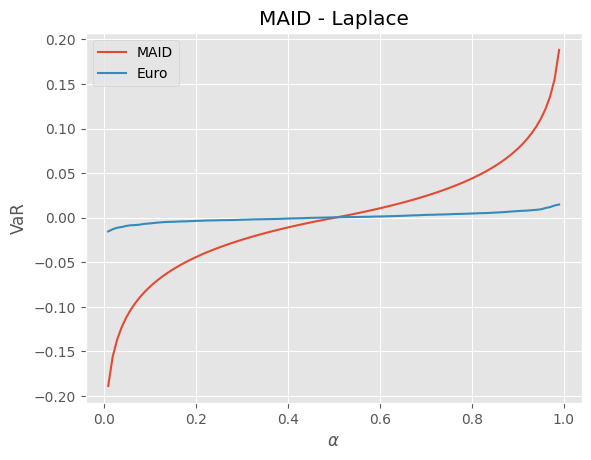

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


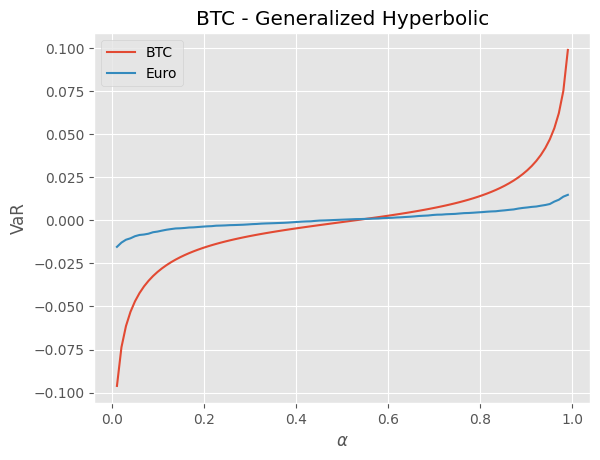

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


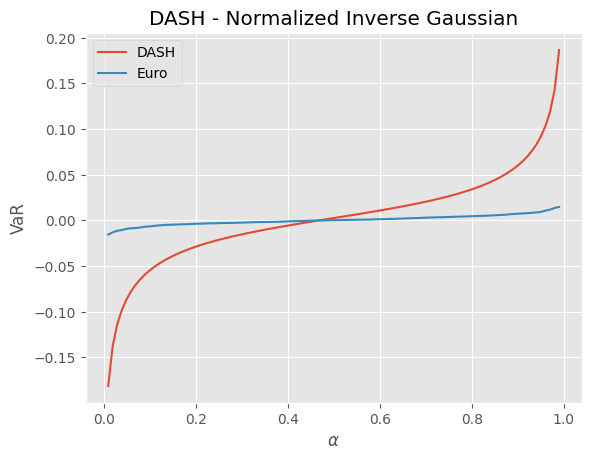

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


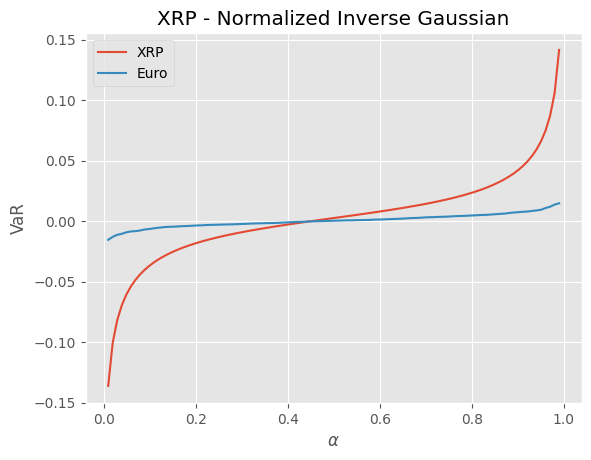

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


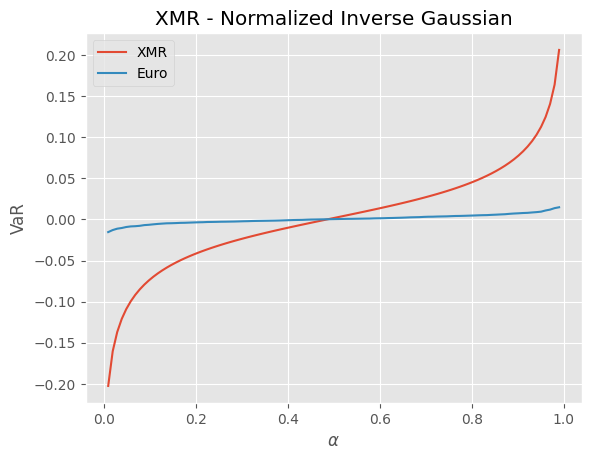

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


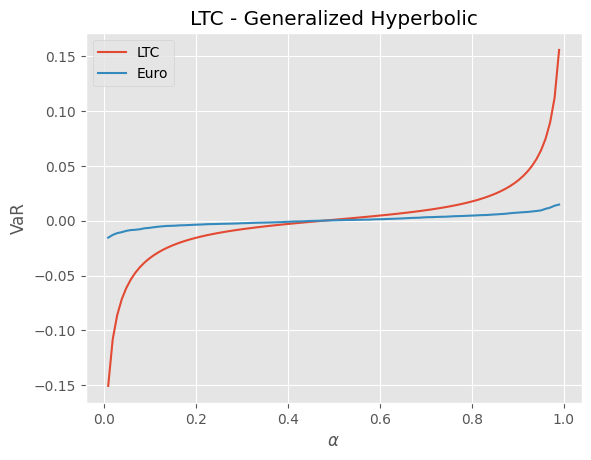

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


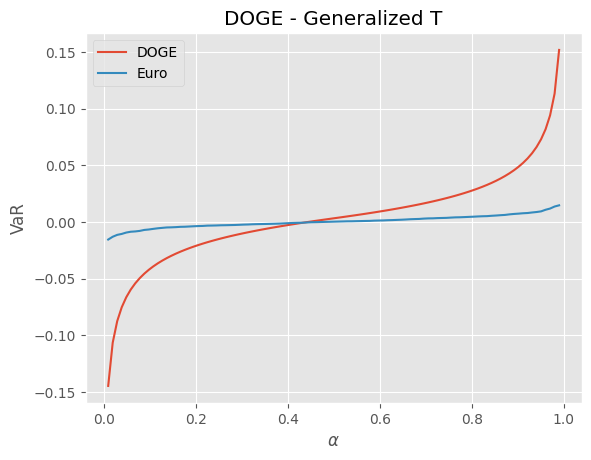

In [106]:
for coin, dist in best_dists.items():
    pydist = info_df[(info_df['coin'] == coin) & (
        info_df['dist'] == dist)]['pydist'].iloc[0]

    def quantile(x): return np.vectorize(pydist.quantile)(x)
    var = quantile(q)
    fig, ax = plt.subplots()
    ax.plot(q, var, label=coin)
    plt.plot(q, euro_quantile, label = 'Euro')
    ax.set_title(f"{coin} - {pydist.name}")
    ax.set_ylabel('VaR')
    ax.set_xlabel(r'$\alpha$')

    plt.legend();
    plt.savefig(f'../plots/var/{coin}_var.eps')
    plt.show()


### ES Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


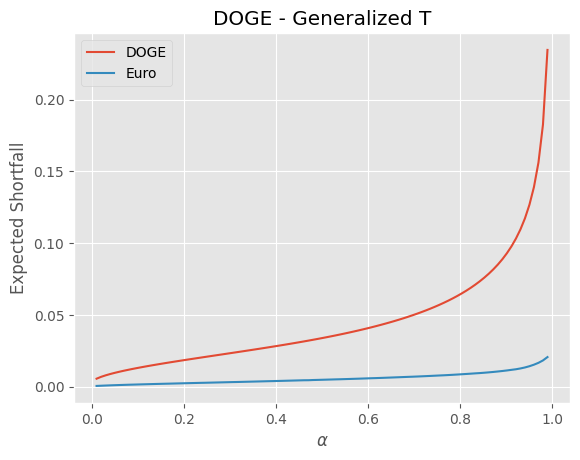

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


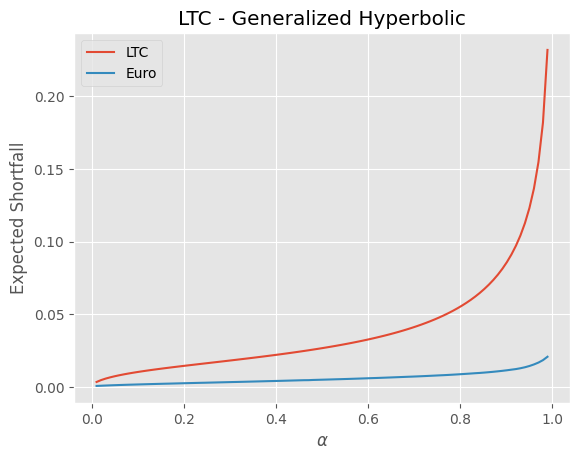

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


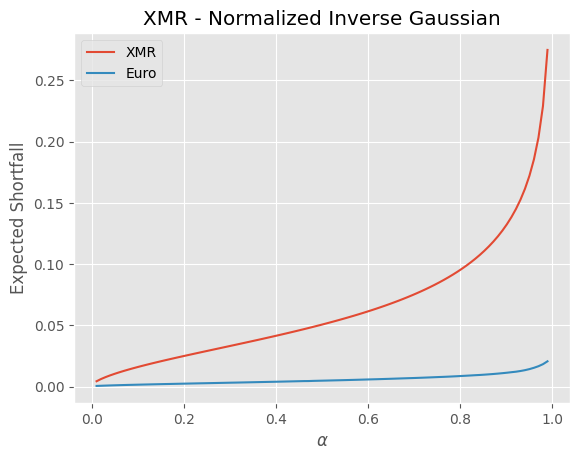

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


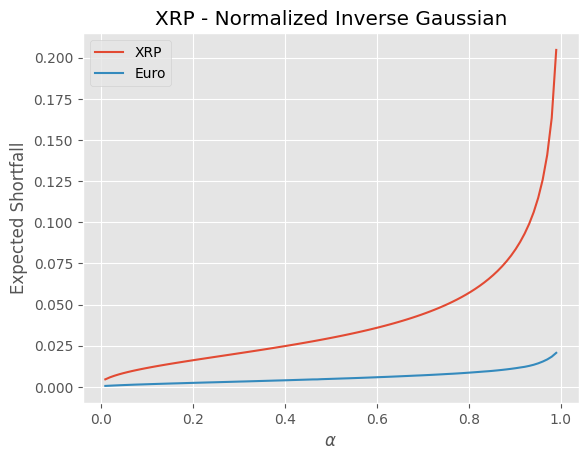

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


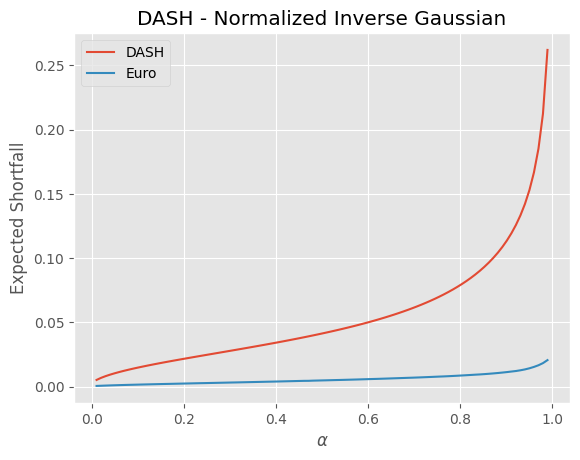

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


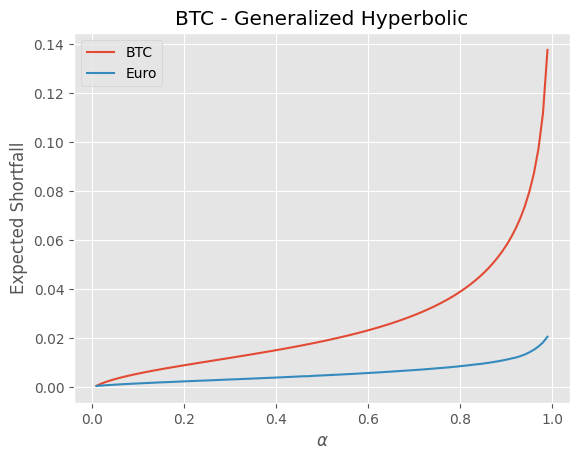

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


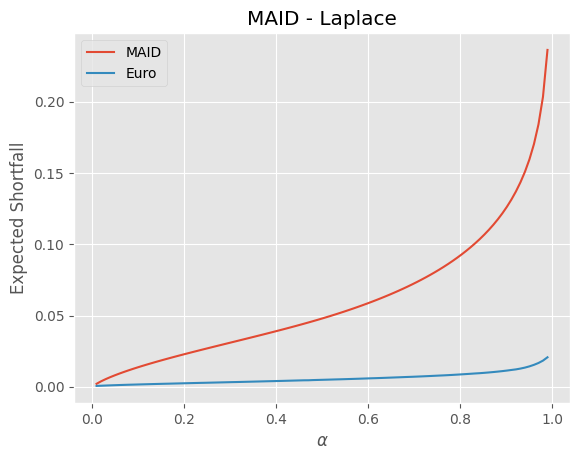

In [111]:
def empirical_es(var, data):
    return np.sum(np.multiply(data >= var, data))/np.sum(data >= var)


empirical_es_euro = [empirical_es(
    var, euro['log_return'].dropna()) for var in euro_quantile]

for coin, dist in reversed(best_dists.items()):
    pydist = info_df[(info_df['coin'] == coin) & (
        info_df['dist'] == dist)]['pydist'].iloc[0]

    es_func = lambda x: np.vectorize(pydist.expected_shortfall)(x)

    es = es_func(q)
    fig, ax = plt.subplots()
    ax.plot(q, es, label=coin)
    ax.plot(q, empirical_es_euro, label = 'Euro')

    ax.set_ylabel('Expected Shortfall')
    ax.set_xlabel(r'$\alpha$')

    ax.set_title(f"{coin} - {pydist.name}")
    plt.legend()
    plt.savefig(f'../plots/es/{coin}_es.eps')
    plt.show();
